# Dataset link:

In [2]:
#https://www.kaggle.com/mirichoi0218/insurance

# importing liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
x=pd.read_csv("C:\\Users\\user\\Downloads\\archive (3)\\insurance.csv")

In [7]:
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
## number of rows and columns
x.shape

(1338, 7)

In [10]:
# getting some informations about the dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
x.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
x.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
x.isnull().values.any()

False

So we can say that There are no missing values.

so we have 3 categorical features

1.sex

2.smoker

3.Region

In [16]:
x['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

1.The minimum cost of an insurance is 1122

2.The maximum cost of an insurance is 63770

# EDA:

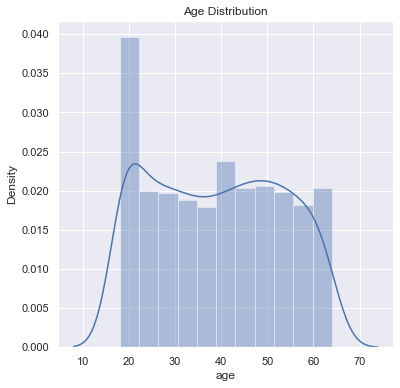

In [20]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(x['age'])
plt.title('Age Distribution')
plt.show()

In [22]:
x['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

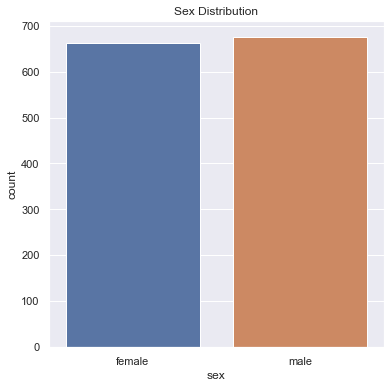

In [21]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=x)
plt.title('Sex Distribution')
plt.show()

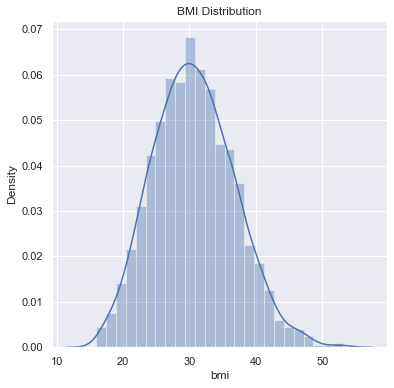

In [24]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(x['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

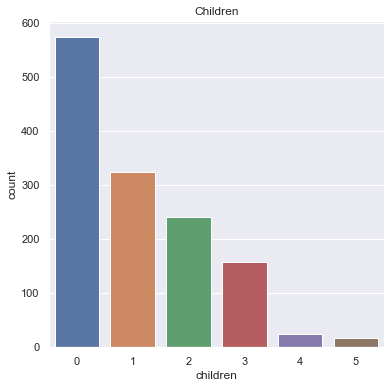

In [25]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=x)
plt.title('Children')
plt.show()

Let's analyze the medical insurance charges by age, bmi and children according to the smoking factor

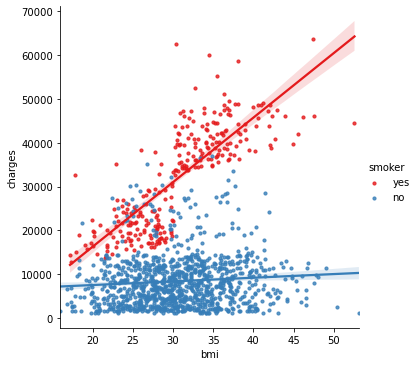

In [18]:
sns.lmplot( x='bmi',y='charges', data=x, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

In [26]:
x['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

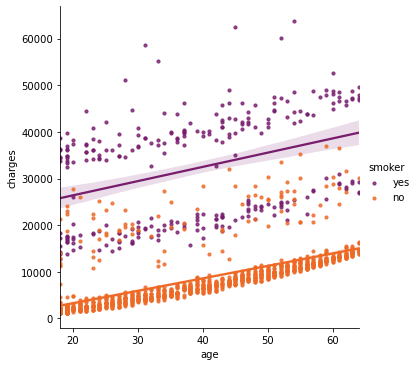

In [19]:
sns.lmplot(x='age', y='charges', hue='smoker', data=x, palette='inferno', scatter_kws={"s": 10})
plt.show()

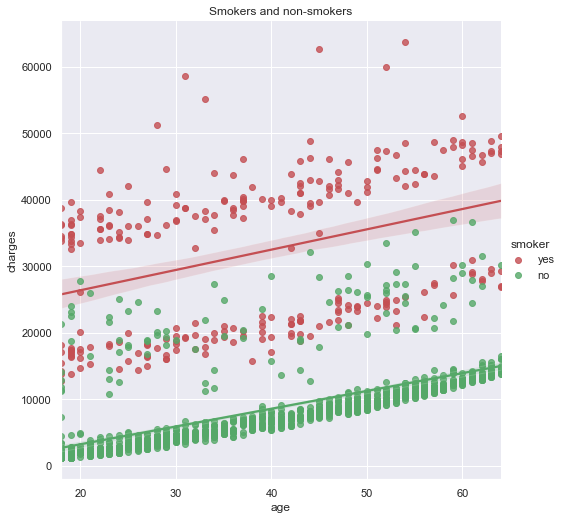

In [29]:
#a relationship plot between age, smoker and charges for medical insurance
sns.lmplot(x="age", y="charges", hue="smoker", data=x, palette=dict(yes="r", no="g"), size = 7);
plt.title('Smokers and non-smokers')
plt.show()

we can say smoking has the highest impact on the medical insurance costs.

While it seems obvious that the charges increase linearly with age, smoking appears to be the highest contributor to charges.

But cost is also increasing with age

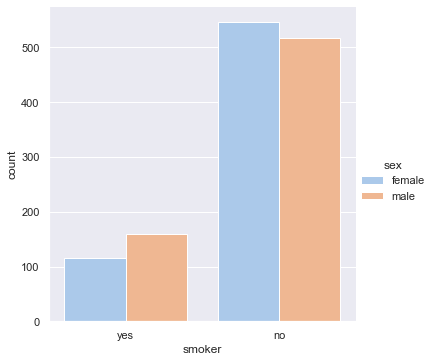

In [27]:
#distribution of male and female in relation with smoking habit
sns.catplot(x="smoker", kind="count", hue = 'sex', data = x , palette='pastel');
plt.show()

the majority understands the downsides of smoking.

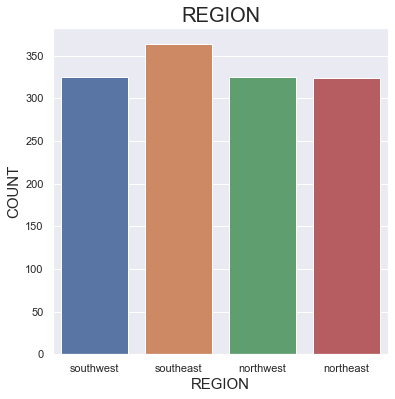

In [28]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=x)
plt.title('REGION',fontdict={'fontsize': 20})
plt.xlabel('REGION',fontdict={'fontsize': 15})
plt.ylabel('COUNT',fontdict={'fontsize': 15})

plt.show()

# Converting Categorical Features to Numerical

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(x.sex.drop_duplicates())
x.sex = le.transform(x.sex)

le.fit(x.smoker.drop_duplicates())
x.smoker = le.transform(x.smoker)

le.fit(x.region.drop_duplicates())
x.region = le.transform(x.region)

x.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int32
charges     float64
dtype: object

In [36]:
x.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


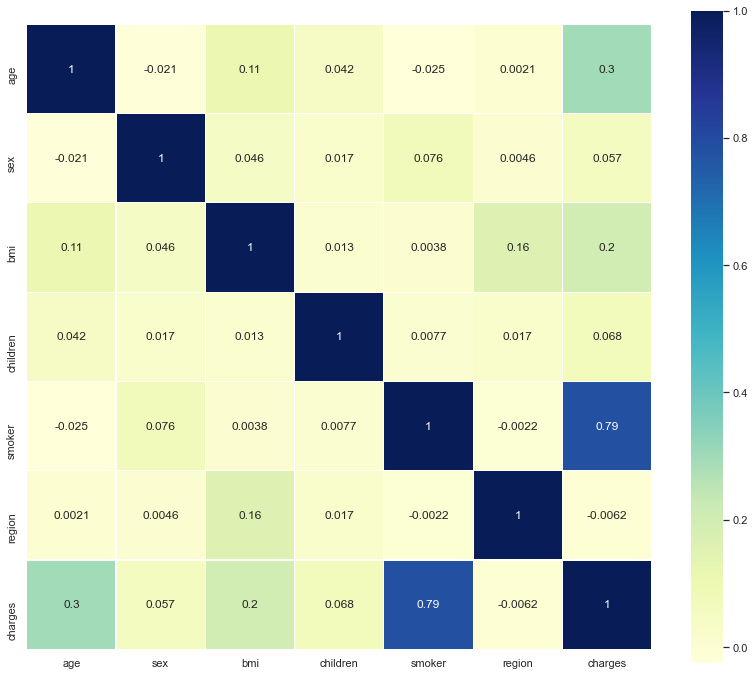

In [39]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(x.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

we have a co relation with the smoking,BMI and age

# Splitting the data into Training data & Testing Data

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

In [46]:
X = x.drop(columns='charges', axis=1)
Y = x['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# MODEL TRAINING

# Linear regression

In [48]:
# loading the Linear Regression model
regressor = LinearRegression()

In [49]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [50]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [54]:
# Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [56]:
y_predict = regressor.predict(X_test)

In [99]:
accuracy = regressor.score(X_test, Y_test)
print('Accuracy of linear reression model is = ', accuracy)

Accuracy of linear reression model is =  0.7445422986536503


# Random forest

In [75]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[200,600,1000],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train, Y_train)

Wall time: 7min 56s


In [76]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8478159405315868,
 RandomForestRegressor(max_depth=60, min_samples_leaf=12, min_samples_split=9,
                       n_estimators=1000))

In [78]:
rf_reg = RandomForestRegressor(max_depth=60, min_samples_leaf=12, min_samples_split=9,
                       n_estimators=1000)
rf_reg.fit(X_train,Y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=12, min_samples_split=9,
                      n_estimators=1000)

In [98]:
Accuracy = rf_reg.score(X_test, Y_test)
print(f'Accuracy : {Accuracy:.3}')

Accuracy : 0.866


1.smoker(0.704242)
2.bmi(0.167949)
3.age(0.112480)
4.children(0.010170)
5.region(0.003980)
6.sex(0.001179)


<BarContainer object of 6 artists>

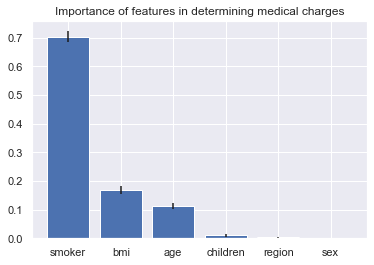

In [104]:
importances = rf_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(X.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

# Best Algorithm:

Random Forest Regressor: 87%

In [106]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [107]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [108]:
rf_tuned_loaded

RandomForestRegressor(max_depth=60, min_samples_leaf=12, min_samples_split=9,
                      n_estimators=1000)

# Building a Predictive System

In [111]:
#Predicting the Medical Charges
y_test_predic = rf_tuned_loaded.predict(X_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': Y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
17,2395.17155,5061.405631
1091,11286.53870,12238.350428
273,9617.66245,12061.709672
270,1719.43630,3807.588128
874,8891.13950,9355.322550
...,...,...
232,1727.78500,2366.723892
323,11566.30055,12923.752597
1337,29141.36030,27165.371551
1066,8978.18510,10233.320927


In [112]:
final_values.head(5)

,Actual values,Predicted values
17,2395.17155,5061.405631
1091,11286.53870,12238.350428
273,9617.66245,12061.709672
270,1719.43630,3807.588128
874,8891.13950,9355.322550


In [113]:
final_values.tail()

,Actual values,Predicted values
232,1727.78500,2366.723892
323,11566.30055,12923.752597
1337,29141.36030,27165.371551
1066,8978.18510,10233.320927
966,23967.38305,23814.840072


# CONCLUSION

we can say random forest is the winner with 88% test accurecy.

Smoking is the greatest factor that affects medical cost charges.